In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/project')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/project'

In [ ]:
ls

car_bike/


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg16=VGG16(input_shape=[224,224,3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 24s 0us/step


In [ ]:
for layer in vgg16.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:

for layer in vgg16.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model=Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/project')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/project'

In [ ]:
loc=glob('car_bike/train/*')

In [ ]:
loc

['car_bike/train/Car', 'car_bike/train/Bike']

In [ ]:
loc2=glob('car_bike/validation/*')

In [ ]:
loc2

['car_bike/validation/bike', 'car_bike/validation/car']

In [ ]:
train_data=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data=ImageDataGenerator(rescale = 1./255)

In [ ]:
training_dataset=train_data.flow_from_directory('car_bike/train',class_mode='categorical',
                                                batch_size=32,target_size=(224,224))

Found 3500 images belonging to 2 classes.


In [ ]:
validation_dataset=test_data.flow_from_directory('car_bike/validation',class_mode='categorical',
                                                 batch_size=32,target_size=(224,224))

Found 500 images belonging to 2 classes.


In [ ]:
fit=model.fit(training_dataset,validation_data=validation_dataset,batch_size=32,epochs=10,steps_per_epoch=len(training_dataset),
              validation_steps=len(validation_dataset))

Epoch 1/10
110/110 [==============================] - ETA: 0s - loss: 0.2616 - accuracy: 0.9371

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


110/110 [==============================] - 1100s 10s/step - loss: 0.2616 - accuracy: 0.9371 - val_loss: 0.0451 - val_accuracy: 0.9860
Epoch 2/10
110/110 [==============================] - 59s 541ms/step - loss: 0.0467 - accuracy: 0.9840 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 3/10
110/110 [==============================] - 59s 536ms/step - loss: 0.0562 - accuracy: 0.9797 - val_loss: 0.0609 - val_accuracy: 0.9860
Epoch 4/10
110/110 [==============================] - 60s 546ms/step - loss: 0.0254 - accuracy: 0.9909 - val_loss: 0.0413 - val_accuracy: 0.9860
Epoch 5/10
110/110 [==============================] - 57s 523ms/step - loss: 0.0197 - accuracy: 0.9929 - val_loss: 0.0518 - val_accuracy: 0.9900
Epoch 6/10
110/110 [==============================] - 57s 520ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0403 - val_accuracy: 0.9920
Epoch 7/10
110/110 [==============================] - 58s 523ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0455 - val_accuracy: 0.9

In [ ]:
fit.history

{'loss': [0.26156315207481384,
  0.046710025519132614,
  0.05623491480946541,
  0.02540985494852066,
  0.01969454437494278,
  0.009960545226931572,
  0.01240015123039484,
  0.006501892581582069,
  0.008782589808106422,
  0.010350785218179226],
 'accuracy': [0.9371428489685059,
  0.984000027179718,
  0.9797142744064331,
  0.9908571243286133,
  0.9928571581840515,
  0.9971428513526917,
  0.9968571662902832,
  0.9985714554786682,
  0.9971428513526917,
  0.99657142162323],
 'val_loss': [0.0450909323990345,
  0.036008428782224655,
  0.06091727316379547,
  0.04134580120444298,
  0.05180243402719498,
  0.04028375446796417,
  0.04551676660776138,
  0.05239789932966232,
  0.06502794474363327,
  0.07931617647409439],
 'val_accuracy': [0.9860000014305115,
  0.9900000095367432,
  0.9860000014305115,
  0.9860000014305115,
  0.9900000095367432,
  0.9919999837875366,
  0.9919999837875366,
  0.9900000095367432,
  0.9879999756813049,
  0.9879999756813049]}

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

<Axes: >

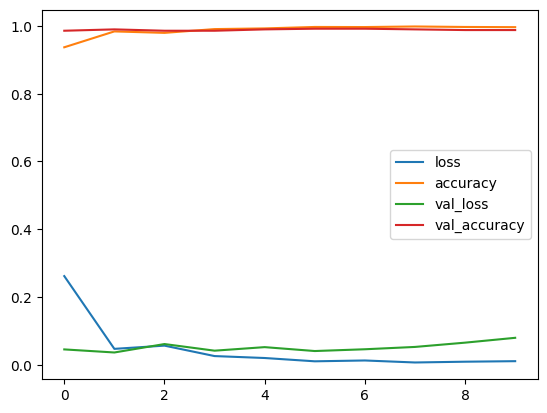

In [ ]:
pd.DataFrame(fit.history).plot()

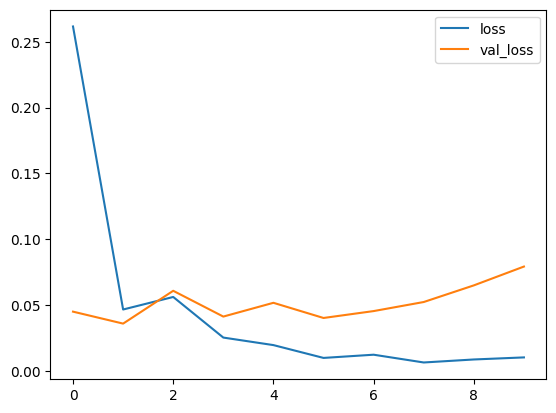

In [ ]:
plt.plot(fit.history['loss'],label='loss')
plt.plot(fit.history['val_loss'],label='val_loss')
plt.legend()

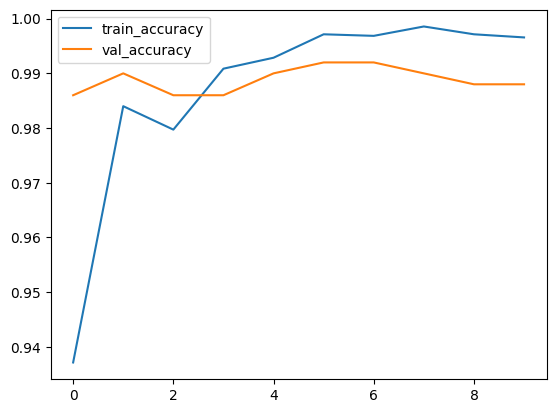

In [ ]:
plt.plot(fit.history['accuracy'],label='train_accuracy')
plt.plot(fit.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
os.getcwd()

'/content/drive/MyDrive/project'

In [ ]:
model.save('vgg16_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
## lets make prediction
y_pred=model.predict(validation_dataset)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 3s 183ms/step


In [ ]:
y_pred

array([[1.00000000e+00, 9.14353008e-16],
       [1.18016622e-07, 9.99999881e-01],
       [1.52482255e-06, 9.99998450e-01],
       [1.00000000e+00, 1.19426550e-13],
       [1.00000000e+00, 1.15395464e-10],
       [5.84423049e-07, 9.99999404e-01],
       [3.83448833e-06, 9.99996185e-01],
       [7.36205311e-06, 9.99992609e-01],
       [7.17789862e-06, 9.99992847e-01],
       [9.99999762e-01, 2.51723861e-07],
       [1.00000000e+00, 1.64619739e-12],
       [1.00000000e+00, 9.90370363e-09],
       [7.90179183e-05, 9.99920964e-01],
       [1.00000000e+00, 9.91358097e-18],
       [1.73780845e-05, 9.99982595e-01],
       [4.07135167e-06, 9.99995947e-01],
       [1.00000000e+00, 1.96314116e-14],
       [1.00000000e+00, 5.75682622e-13],
       [3.08784911e-05, 9.99969125e-01],
       [1.00000000e+00, 4.29780829e-11],
       [1.00000000e+00, 4.13900922e-14],
       [9.99999762e-01, 1.86800008e-07],
       [1.00000000e+00, 4.82842407e-15],
       [1.61252629e-08, 1.00000000e+00],
       [6.273849

In [ ]:
import numpy as np

In [ ]:
y_pred.shape

(500, 2)

In [ ]:
np.argmax(y_pred,axis=1)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
from keras.models import load_model

In [ ]:
my_model=load_model('vgg16_prediction_model.h5')

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
img=image.load_img('/content/drive/MyDrive/project/car_bike/train/Bike/Bike (1).jpeg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

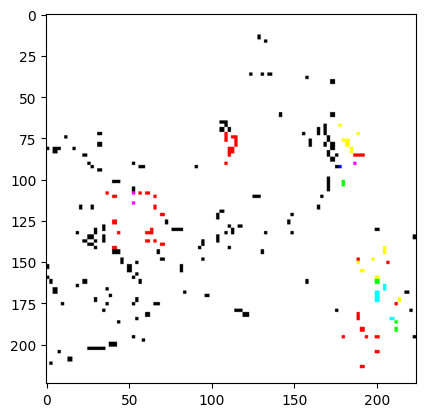

In [ ]:
plt.imshow(x)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255.

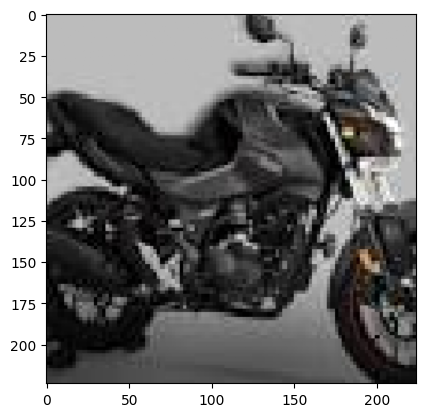

In [ ]:
plt.imshow(x)

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
my_model.predict(img_data)

1/1 [==============================] - 1s 921ms/step


array([[0.00275479, 0.9972452 ]], dtype=float32)

In [ ]:
np.argmax(my_model.predict(img_data),axis=1)

1/1 [==============================] - 0s 29ms/step


array([1])

In [ ]:
## it means if prediction is 1 then it is bike otherwise car